In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
# Read the dataset.
dataset = pd.read_csv("q2_dataset.csv").to_numpy()

# Shuffle and split the dataset into 5 fold.
random.shuffle(dataset)

fold1 = dataset[:100]
fold2 = dataset[100:200]
fold3 = dataset[200:300]
fold4 = dataset[300:400]
fold5 = dataset[400:500]

folds = [fold1, fold2, fold3, fold4, fold5]
folds = np.asarray(folds)

In [ ]:
# Train function that calculates the weights.
def trainKFold(X, Y):
    # We calculate the weights by the formula in Question 2.1
    B = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return B

In [ ]:
# Define the functions for errors.


def MSE(pred, Y, beta):
    return (np.sum((pred - Y)**2)) / len(Y)

def R2(pred, Y, beta):
    # 1 - RSS/TSS
    return 1 - ( np.sum((Y-pred)**2) )/np.sum((Y-np.mean(pred))**2) 

def MAE(pred, Y, beta):
    return np.sum(abs(pred-Y))  /(Y.shape[0])
    
def MAPE(pred, Y, beta):
    return (1/Y.shape[0])* np.sum(abs((pred-Y)/Y))

In [ ]:
# Full Batch Gradient Descent for Lasso
def fullbatch_gd(X, Y, epochs, learningRate, lambdal1):

    samples = X.shape[0]
    features = X.shape[1]

    W = np.random.normal(0, 0.01, (features))
    

    for i in range(epochs):
        z = np.dot(X, W)
        a = 1 / (1 + np.exp(-z))

        gradient = np.dot(X.T, (Y-a)) / samples
        # W = W - learningRate * np.sum(gradient)
        W = W - learningRate * np.sum(gradient) + (lambdal1 * np.sum(W))
        # W = W + lambdal1 * np.sum(W)
        # for k in W:
        #     if k > 0:
        #         k += lambdal1 * k
        #     else:
        #         k -= lambdal1 * k
    
    return W

In [ ]:
# k Fold
def kFold(folds, k, lambdaL1):
    mse = []
    r2 = []
    mae = []
    mape = []

    for i in range(k):
        testset = folds[i,:,:]
        trainset = []

        for m in range(k):
            if m != i:
                trainset.append(folds[m,:,:])

        trainset = np.asarray(trainset)
        trainset = trainset.reshape((trainset.shape)[0]*(trainset.shape)[1], (trainset.shape)[2])

        # Separate labels from the trainset and testset
        tests = testset[:,[0,1,2,3,4,5,6]]
        testlabels = testset[:,[7]]
        trains = trainset[:,[0,1,2,3,4,5,6]]
        trainlabels = trainset[:,[7]]

        # Train the model to calculate weights
        if lambdaL1==0:
            weights = trainKFold(trains, trainlabels)
        else:
            weights = fullbatch_gd(trains, trainlabels, 1000, 0.01, lambdaL1)
        # Make predictions
        pred = np.dot(tests, weights)

        # Calculate errors
        print("For Fold ", i+1, " and lambda = ", lambdaL1)
        mseResult = MSE(pred, testlabels, weights)
        mse.append(mseResult)
        print("Mean Squared Error: \t\t\t", mseResult)
        r2Result = R2(pred, testlabels, weights)
        r2.append(r2Result)
        print("R^2: \t\t\t\t\t", r2Result)
        maeResult = MAE(pred, testlabels, weights)
        mae.append(maeResult)
        print("Mean Absolute Error: \t\t\t", maeResult)
        mapeResult = MAPE(pred, testlabels, weights)
        mape.append(mapeResult)
        print("Mean Absolute Percentage Error: \t", mapeResult)
        print("\n")


    
    return mse, r2, mae, mape

mse1, r21, mae1, mape1 = kFold(folds, (folds.shape)[0], 0)
mse2, r22, mae2, mape2 = kFold(folds, (folds.shape)[0], 0.01)

For Fold  1  and lambda =  0
Mean Squared Error: 			 0.006684699269949809
R^2: 					 0.716265640218082
Mean Absolute Error: 			 0.06522573009986223
Mean Absolute Percentage Error: 	 0.10937676266257071


For Fold  2  and lambda =  0
Mean Squared Error: 			 0.00799300061165037
R^2: 					 0.7063165825758658
Mean Absolute Error: 			 0.06473431883547837
Mean Absolute Percentage Error: 	 0.11143915021176262


For Fold  3  and lambda =  0
Mean Squared Error: 			 0.006019600899147973
R^2: 					 0.6869794729792029
Mean Absolute Error: 			 0.0591312279473759
Mean Absolute Percentage Error: 	 0.09123770867477536


For Fold  4  and lambda =  0
Mean Squared Error: 			 0.0039236688608282
R^2: 					 0.7764116603911425
Mean Absolute Error: 			 0.049213833551597724
Mean Absolute Percentage Error: 	 0.07056575047348716


For Fold  5  and lambda =  0
Mean Squared Error: 			 0.003950703489047795
R^2: 					 0.7839903412983226
Mean Absolute Error: 			 0.049329905895567586
Mean Absolute Percentage Error: 	 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


For Fold  1  and lambda =  0.01
Mean Squared Error: 			 4.120824460737153e+74
R^2: 					 -99.18438094973801
Mean Absolute Error: 			 2.0281125286751747e+38
Mean Absolute Percentage Error: 	 3.0018282337383542e+38


For Fold  2  and lambda =  0.01
Mean Squared Error: 			 4.267116933544471e+74
R^2: 					 -99.2112868866517
Mean Absolute Error: 			 2.063521282707958e+38
Mean Absolute Percentage Error: 	 3.097421978281262e+38


For Fold  3  and lambda =  0.01
Mean Squared Error: 			 5.044630254858636e+73
R^2: 					 -99.19339784294762
Mean Absolute Error: 			 7.09569790833345e+37
Mean Absolute Percentage Error: 	 9.814445542772721e+37


For Fold  4  and lambda =  0.01
Mean Squared Error: 			 3.633325598373318e+74
R^2: 					 -99.18619208860707
Mean Absolute Error: 			 1.904356375780606e+38
Mean Absolute Percentage Error: 	 2.5778576249474057e+38


For Fold  5  and lambda =  0.01
Mean Squared Error: 			 3.89950428121806e+74
R^2: 					 -99.15800428734403
Mean Absolute Error: 			 1.9731580314717

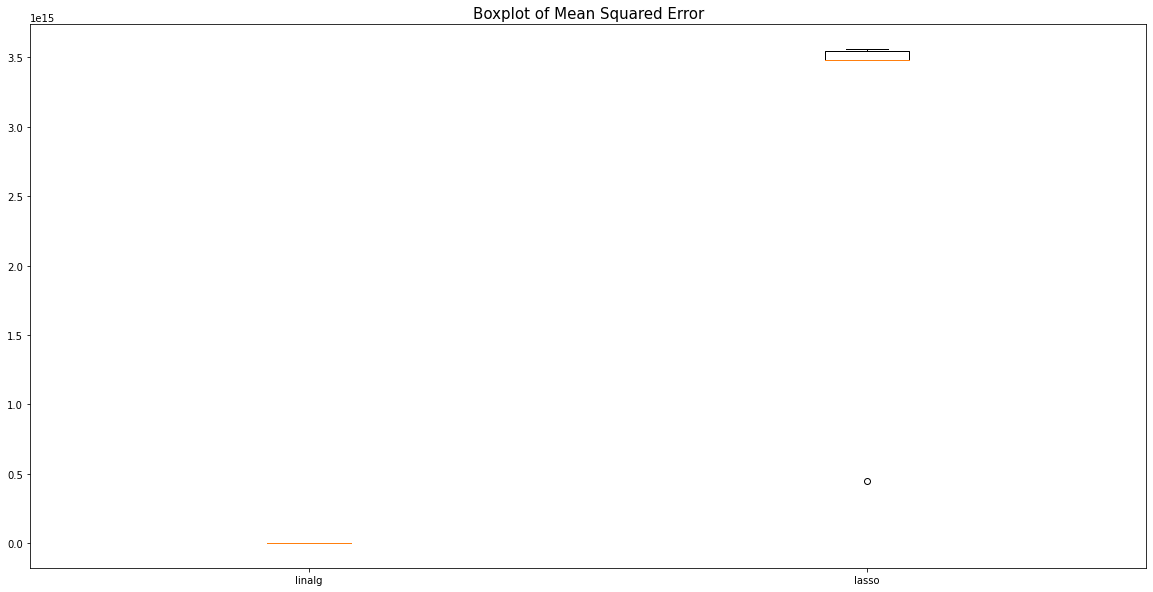

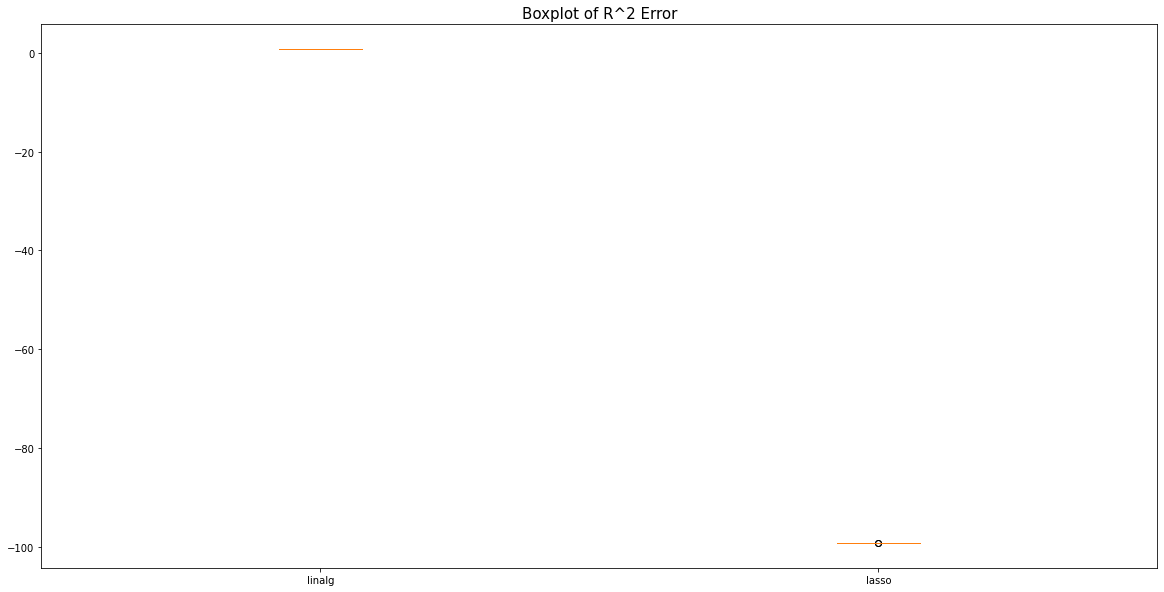

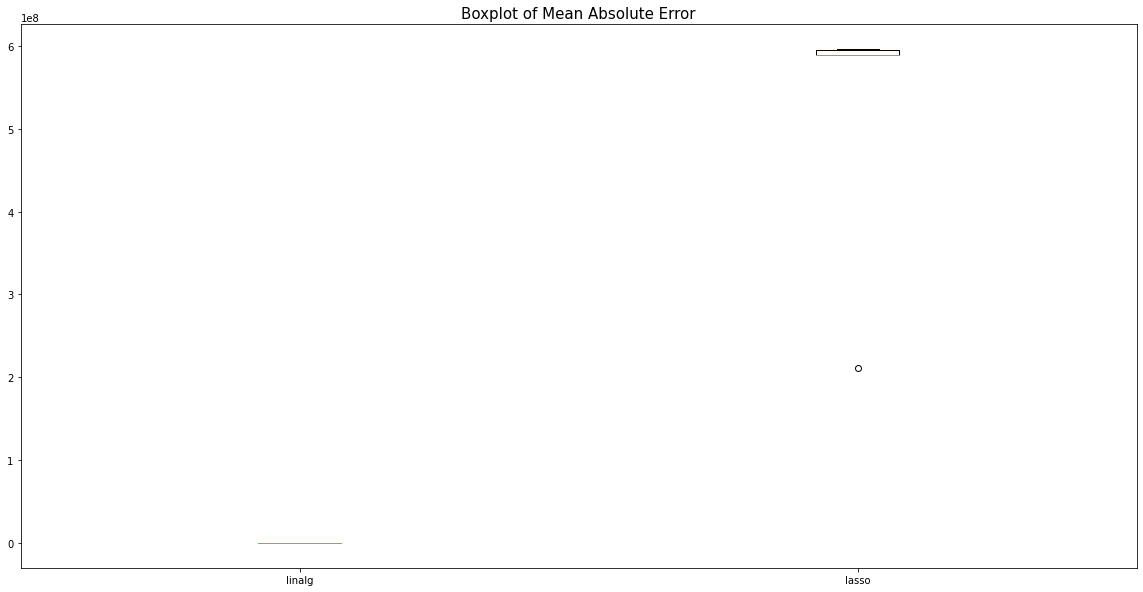

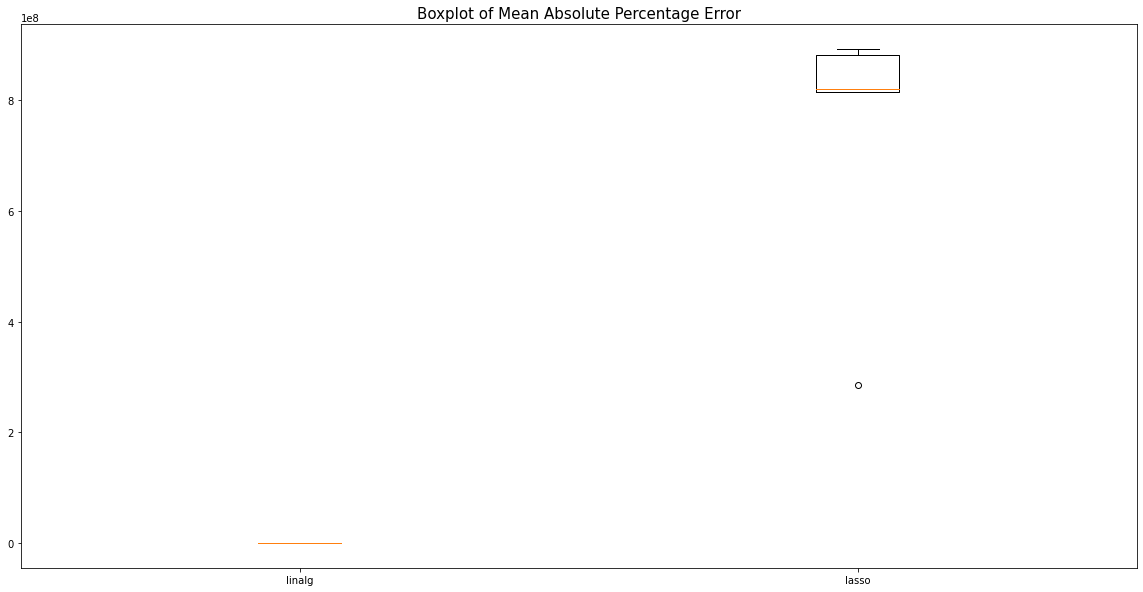

In [ ]:
# Question 2.4
# Plot boxplot for each performance metrics for both models.
def boxPlot(metric1, metric2, perfMetric):

    data = [metric1, metric2]
    plt.figure(figsize=(20, 10))
    plt.boxplot(data, labels=["linalg", "lasso"])
    plt.title("Boxplot of {}".format(perfMetric), fontsize=15)
    plt.show()

boxPlot(mse1, mse2, "Mean Squared Error")
boxPlot(r21, r22, "R^2 Error")
boxPlot(mae1, mae2, "Mean Absolute Error")
boxPlot(mape1, mape2, "Mean Absolute Percentage Error")